<a href="https://colab.research.google.com/github/SwapanGupt/data690_SwapanGupta/blob/main/Assignment06/Assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
!wget https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip

--2021-10-17 16:28:27--  https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip
Resolving ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)... 15.200.243.39, 15.205.92.235, 2600:1f12:18a:7d01:29c7:6ff5:8ad8:c8f0, ...
Connecting to ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)|15.200.243.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385541173 (368M) [application/zip]
Saving to: ‘CollegeScorecard_Raw_Data_01192021.zip.4’

CollegeScorecard_Ra 100%[===================>] 367.68M  33.1MB/s    in 12s     

2021-10-17 16:28:39 (31.0 MB/s) - ‘CollegeScorecard_Raw_Data_01192021.zip.4’ saved [385541173/385541173]



In [151]:
!unzip CollegeScorecard_Raw_Data_01192021.zip

Archive:  CollegeScorecard_Raw_Data_01192021.zip
replace Raw Data Files/MERGED2011_12_PP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [152]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go

In [153]:
# <2> 
# Display the current workin directory using os.getcwd()

print(os.getcwd())

# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder
dir = '/content/Raw Data Files'
file = os.listdir(dir)

/content


In [154]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

all_files = [file for file in file if 'MERGED' in file]
file

['Crosswalks.zip',
 'MERGED2017_18_PP.csv',
 'MERGED2005_06_PP.csv',
 'data.yaml',
 'MERGED2003_04_PP.csv',
 'MERGED2012_13_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED2018_19_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2000_01_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2014_15_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1998_99_PP.csv']

In [155]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

df_list = []
def read(x):
    df = pd.read_csv(dir+'/'+x,usecols=['UNITID', 'INSTNM', 'STABBR' , 'REGION' , 'ADM_RATE' , 'TUITIONFEE_IN'])
    df['year'] = x.split('_')[0].replace('MERGED','')
    df_list.append(df)  

for x in all_files:
    read(x)
df1 = pd.concat(df_list)
df1

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100654,Alabama A & M University,AL,5.0,0.9027,9857.0,2017
1,100663,University of Alabama at Birmingham,AL,5.0,0.9181,8328.0,2017
2,100690,Amridge University,AL,5.0,NaN,6900.0,2017
3,100706,University of Alabama in Huntsville,AL,5.0,0.8123,10280.0,2017
4,100724,Alabama State University,AL,5.0,0.9787,11068.0,2017
...,...,...,...,...,...,...,...
6697,434779,WATERMAN TRAINING INSTITUTE,CA,8.0,NaN,NaN,1998
6698,434849,CSC Institute,PA,2.0,NaN,NaN,1998
6699,434867,CENTER FOR EMPLOYMENT TRAINING-SANTA ROSA,CA,8.0,NaN,NaN,1998
6700,434876,CENTER FOR EMPLOYMENT TRAINING-TRACY CAMPUS,CA,8.0,NaN,NaN,1998


In [156]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
print("Number of Rows: ", len(df1))
print("Number of Columns: ", len(df1.columns))

Number of Rows:  163331
Number of Columns:  7


In [157]:
df1.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100654,Alabama A & M University,AL,5.0,0.9027,9857.0,2017
1,100663,University of Alabama at Birmingham,AL,5.0,0.9181,8328.0,2017
2,100690,Amridge University,AL,5.0,NaN,6900.0,2017
3,100706,University of Alabama in Huntsville,AL,5.0,0.8123,10280.0,2017
4,100724,Alabama State University,AL,5.0,0.9787,11068.0,2017


In [158]:
df1.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
6697,434779,WATERMAN TRAINING INSTITUTE,CA,8.0,NaN,NaN,1998
6698,434849,CSC Institute,PA,2.0,NaN,NaN,1998
6699,434867,CENTER FOR EMPLOYMENT TRAINING-SANTA ROSA,CA,8.0,NaN,NaN,1998
6700,434876,CENTER FOR EMPLOYMENT TRAINING-TRACY CAMPUS,CA,8.0,NaN,NaN,1998
6701,434900,Dewey University-Carolina,PR,9.0,NaN,NaN,1998


In [159]:
df1.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
4089,362700,Sunstate Academy,FL,5.0,NaN,NaN,2017
6857,460862,Aveda Institute-Portland,OR,8.0,NaN,NaN,2013
5099,384342,Heartland Community College,IL,3.0,NaN,2610.0,2008
949,139092,Beauty College of America,GA,5.0,NaN,NaN,2008
1289,150163,Butler University,IN,3.0,0.7393,25414.0,2006


In [160]:
df1.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
6697,False,False,False,False,True,True,False
6698,False,False,False,False,True,True,False
6699,False,False,False,False,True,True,False
6700,False,False,False,False,True,True,False


In [161]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6701
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44912 non-null   float64
 5   TUITIONFEE_IN  79195 non-null   float64
 6   year           163331 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 10.0+ MB


In [162]:
df1.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44912.000000,79195.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871
std,4.571721e+06,2.189217,0.217058,9986.003542
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [163]:

# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.
df_UMBC = df1[df1['INSTNM'] == 'University of Maryland-Baltimore County']

In [164]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)

print("Number of Rows: ", len(df_UMBC))
print("Number of Columns: ", len(df_UMBC.columns))

Number of Rows:  23
Number of Columns:  7


In [165]:
df_UMBC.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1660,163268,University of Maryland-Baltimore County,MD,2.0,0.6035,9764.0,2012
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [166]:
df_UMBC.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1710,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998


In [167]:
df_UMBC.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003


In [168]:
df_UMBC.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1478,False,False,False,False,False,False,False
1819,False,False,False,False,False,False,False
1873,False,False,False,False,False,False,False
1660,False,False,False,False,False,False,False
1415,False,False,False,False,False,False,False
1893,False,False,False,False,False,False,False
1629,False,False,False,False,False,False,False
1955,False,False,False,False,True,True,False
2049,False,False,False,False,True,True,False
1767,False,False,False,False,False,False,False


In [169]:
df_UMBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1478 to 1982
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   year           23 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [170]:
df_UMBC.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


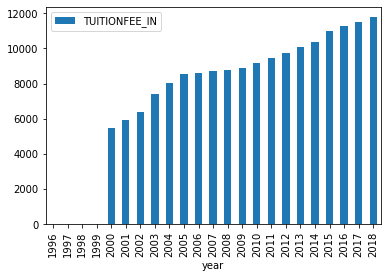

In [171]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart
df2=df_UMBC.sort_values(by='year')
df2.plot(x="year", y=["TUITIONFEE_IN"], kind="bar")

In [178]:
# Using Plotly Express
import plotly.express as px
fig = px.bar(
    data_frame= df2,
    x="year",
    y="TUITIONFEE_IN"
)
fig.show()

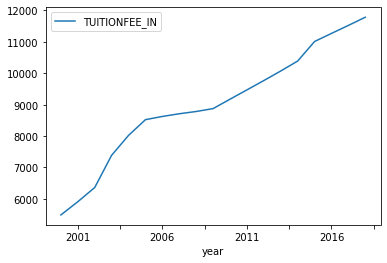

In [172]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

#(Write code here)
df2.plot(x="year", y=["TUITIONFEE_IN"], kind="line")

In [179]:
# Using Plotly Express
import plotly.express as px
fig = px.line(
    data_frame= df2,
    x="year",
    y="TUITIONFEE_IN"
)
fig.show()

In [173]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

#(Write code here)
tuition_change = df2['TUITIONFEE_IN'].tolist()
tuition_change


[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [174]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)
percent_change = [0]
for i in range(1,len(tuition_change)):
    difference = (tuition_change[i]-tuition_change[i-1])/tuition_change[i-1]
    percent_change.append(difference*100)
percent_change

[0,
 nan,
 nan,
 nan,
 nan,
 7.650273224043716,
 7.648054145516074,
 16.12700408676517,
 8.554412560909583,
 6.234413965087282,
 1.1971830985915493,
 0.9974483878450475,
 0.8268259072117593,
 1.0478359908883828,
 3.370153291253381,
 3.227565151019518,
 3.1372134783986483,
 3.11347808275297,
 3.1386571315057608,
 5.989984591679507,
 2.344175904052335,
 2.254971590909091,
 2.2573363431151243]

In [175]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)
rounded_list = []
for i in percent_change:
        rounded_list.append(round(i,2))
rounded_list

[0,
 nan,
 nan,
 nan,
 nan,
 7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

In [176]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)
df2['PCT_CHANGE'] = rounded_list
df2

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,0.00
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


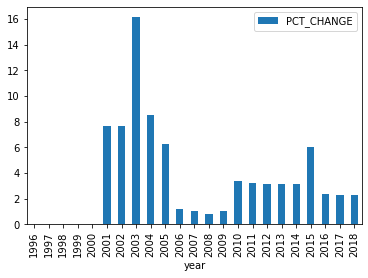

In [177]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)
df2=df2.sort_values(by='year')
df2.plot(x="year", y=["PCT_CHANGE"], kind="bar")

In [180]:
# Using Plotly Express
import plotly.express as px
fig = px.bar(
    data_frame= df2,
    x="year",
    y="PCT_CHANGE"
)
fig.show()

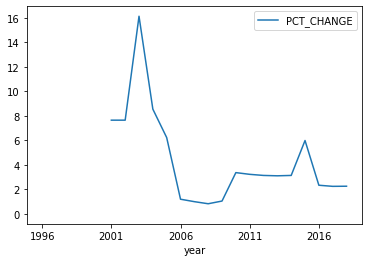

In [182]:
df2=df2.sort_values(by='year')
df2.plot(x="year", y=["PCT_CHANGE"], kind="line")

In [181]:
# Using Plotly Express
import plotly.express as px
fig = px.line(
    data_frame= df2,
    x="year",
    y="PCT_CHANGE"
)
fig.show()

In [183]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)
def per_change(tuition_change):
    percent_change = [0]
    for fee in range(1,len(tuition_change)):
        difference = (tuition_change[fee]-tuition_change[fee-1])/tuition_change[fee-1]
        percent_change.append(difference*100)
    rounded_list = []
    for j in percent_change:
        rounded_list.append(round(j,2))
    return rounded_list

In [184]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
df_JHU = df1[df1['INSTNM']=='Johns Hopkins University']

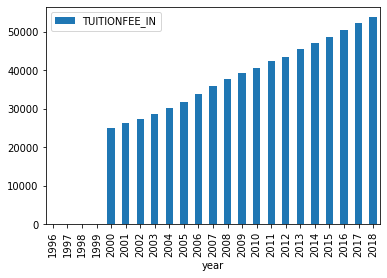

In [185]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)
df3=df_JHU.sort_values(by='year')
df3.plot(x="year", y=["TUITIONFEE_IN"], kind="bar")


In [186]:
import plotly.express as px
fig = px.bar(
    data_frame= df3,
    x="year",
    y="TUITIONFEE_IN"
)
fig.show()

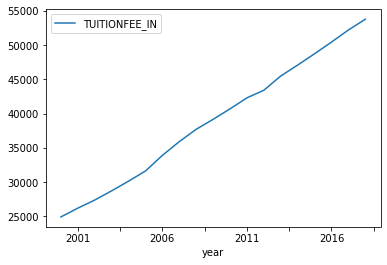

In [ ]:
df3=df_JHU.sort_values(by='year')
df3.plot(x="year", y=["TUITIONFEE_IN"], kind="line")

In [187]:
import plotly.express as px
fig = px.line(
    data_frame= df3,
    x="year",
    y="TUITIONFEE_IN"
)
fig.show()

In [188]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)
tuition_change = df3['TUITIONFEE_IN'].tolist()
percent_change = per_change(tuition_change)

In [189]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)
df3['PCT_CHANGE'] = percent_change
df3

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,0.00
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,5.13
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,4.50
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,4.89
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,4.91
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,4.91


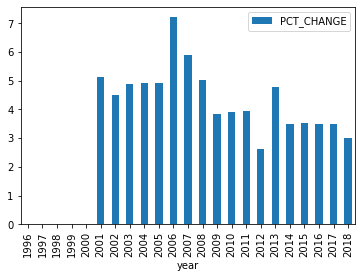

In [190]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)
df3=df3.sort_values(by='year')
df3.plot(x="year", y=["PCT_CHANGE"], kind="bar")


In [191]:
import plotly.express as px
fig = px.bar(
    data_frame= df3,
    x="year",
    y="PCT_CHANGE"
)
fig.show()

In [192]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)
df_umbc2 = df2[['year']]
df_umbc2['UMBC_PCT'] = df2['PCT_CHANGE']
df_umbc2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,UMBC_PCT
2151,1996,0.00
2049,1997,NaN
1982,1998,NaN
1955,1999,NaN
1926,2000,NaN
1915,2001,7.65
1893,2002,7.65
1873,2003,16.13
1830,2004,8.55
1819,2005,6.23


In [193]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)
df_jhu2 = df3[['year']]
df_jhu2['JHU_PCT'] = df3['PCT_CHANGE']
df_jhu2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,JHU_PCT
2139,1996,0.00
2039,1997,NaN
1973,1998,NaN
1946,1999,NaN
1917,2000,NaN
1906,2001,5.13
1884,2002,4.50
1865,2003,4.89
1823,2004,4.91
1812,2005,4.91


In [194]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)
merged_dfs = pd.merge(df_umbc2,df_jhu2)
merged_dfs

,year,UMBC_PCT,JHU_PCT
0,1996,0.00,0.00
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,7.65,5.13
6,2002,7.65,4.50
7,2003,16.13,4.89
8,2004,8.55,4.91
9,2005,6.23,4.91


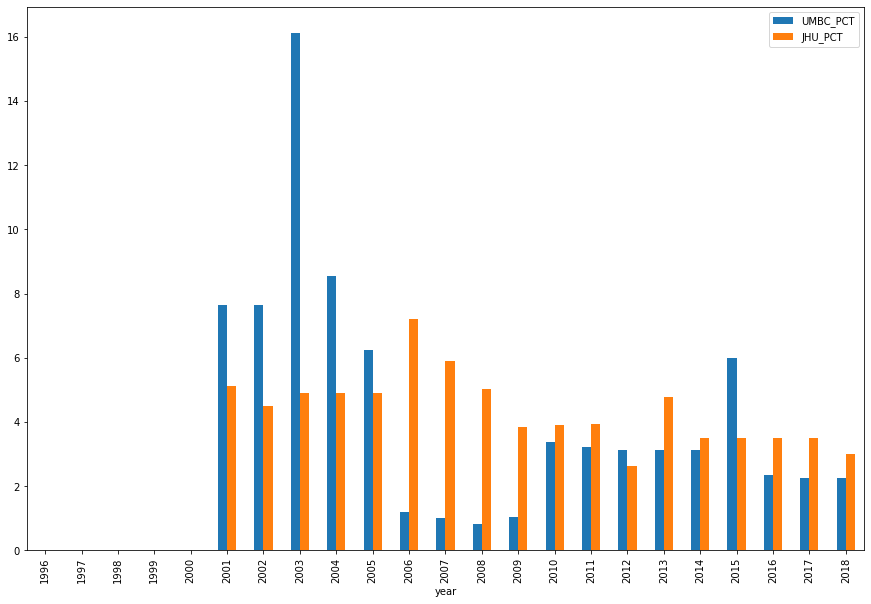

In [195]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)
merged_dfs.plot.bar(x='year',y=["UMBC_PCT","JHU_PCT"],figsize = (15, 10))

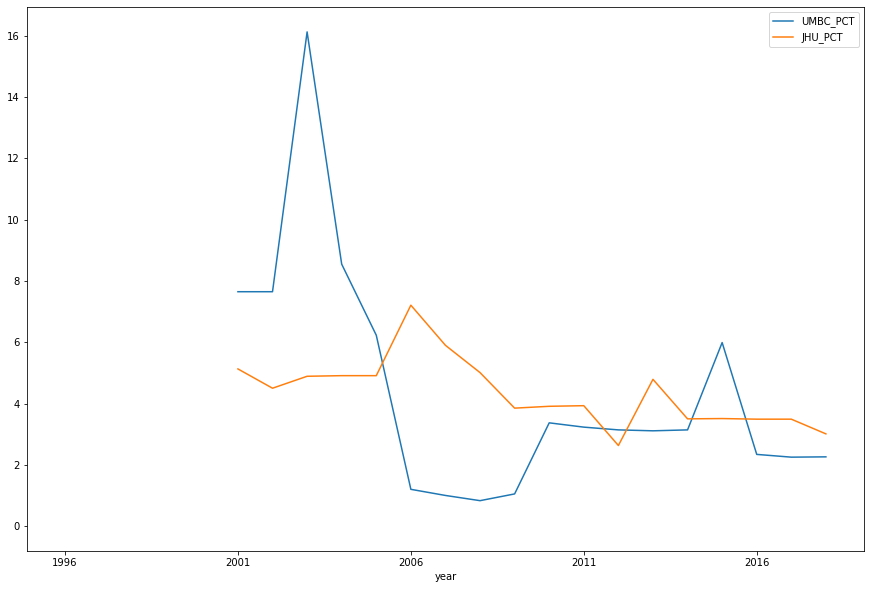

In [196]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)
merged_dfs.plot.line(x='year',y=["UMBC_PCT","JHU_PCT"],figsize = (15, 10))

In [197]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

## This Assignment shows us there was a rapid change in tution fees in UMBC.We also presented the graphical expessions using bar graph and line graph.

## Wherere as the tution fees in JHU have linear changes which are represented using bar graph and line graph.